In [208]:
%config Completer.use_jedi = False
import pandas as pd
import os
import json
from glob import glob
import seaborn as sns
import numpy as np

In [209]:
pd.set_option('display.max_rows', 200)

In [210]:
import matplotlib.pyplot as plt

In [352]:
summary_paths = glob('../modules/outputs/eval_summaries/*.json')

In [353]:
all_summaries = []
for path in summary_paths: 
    if 'test' in path: continue
    filename = os.path.basename(path)
    filename_no_ext = filename.split('.')[0]
    filename_no_ext_split = filename_no_ext.split('_')
    # print(filename_no_ext_split)
    note = ''
    if len(filename_no_ext_split) == 4: 
        (model_name, data_size, run_idx, sample_idx) = filename_no_ext_split
        gen_model = model_name
    elif len(filename_no_ext_split) == 3: 
        (model_name, data_size, run_idx) = filename_no_ext_split
        sample_idx = -1
        gen_model = model_name
    elif len(filename_no_ext_split) == 1: 
        model_name = filename_no_ext_split[0]
        data_size, run_idx, sample_idx = 0, 0, 0
        gen_model = model_name
    elif len(filename_no_ext_split) == 5 and 'fluent' in filename_no_ext: 
        (model_name, data_size, run_idx, note, sample_idx) = filename_no_ext_split
    elif len(filename_no_ext_split) == 5: 
        (model_name, data_size, run_idx, gen_model, sample_idx) = filename_no_ext_split
    summary = json.load(open(path))
    summary.update(dict(model_name=model_name,
                        gen_model=gen_model,
                        data_size=data_size,
                        run_idx=run_idx,
                        sample_idx=sample_idx,
                        note=note))
    all_summaries.append(summary)

In [354]:
df = pd.DataFrame(all_summaries)
df.sample_idx = df.sample_idx.astype(int)
# df = df.query('sample_idx >= -1 and sample_idx < 4')

In [382]:
df_experimentwise = (df.groupby(['model_name', 'gen_model', 'note', 'run_idx', 'data_size']).mean()
 .reset_index().round(1)
 [['model_name', 'gen_model', 'note', 'data_size', 'run_idx',
   'self_bertscore', 'style_acc', 'cola_acc', 'joint_score', 'gm_score', 'ref_bleu', 'ref_bertscore', 'ppl']])

In [384]:
df_experimentwise

,model_name,gen_model,note,data_size,run_idx,self_bertscore,style_acc,cola_acc,joint_score,gm_score,ref_bleu,ref_bertscore,ppl
0,copy,copy,,0,0,100.0,1.4,92.2,11.9,23.5,30.1,62.2,20.6
1,distilgpt2,distilgpt2,,all,0,58.4,96.4,84.6,46.7,78.1,15.8,49.6,43.2
2,distilgpt2,distilgpt2,,augmented-zeroshot,3,9.4,66.8,36.8,1.4,28.5,0.0,10.2,1.0
3,distilgpt2,gpt2,,all,0,53.3,97.5,92.2,47.2,78.3,12.9,48.0,35.3
4,distilgpt2,gpt2,,all,1,48.7,97.6,93.8,43.8,76.4,11.1,45.6,37.2
5,distilgpt2,gpt2,,all,2,50.3,97.7,93.4,45.2,77.2,11.6,46.2,39.0
6,distilgpt2,gpt2-large,,all,0,54.7,97.7,93.1,49.0,79.2,13.7,48.7,33.6
7,distilgpt2,gpt2-large,,all,1,48.3,97.1,95.9,43.9,76.6,10.9,44.9,35.4
8,distilgpt2,gpt2-large,,all,2,54.5,97.1,93.8,48.5,79.2,14.0,48.9,34.6
9,distilgpt2,gpt2-medium,,all,0,54.4,97.1,94.4,49.0,79.3,13.0,48.9,35.6


In [360]:
df.loc[df.data_size.astype(str).str.contains('manual'), 'run_idx'] = df.data_size[df.data_size.astype(str).str.contains('manual')].apply(lambda x: x[-1])
df.loc[df.data_size.astype(str).str.contains('manual'), 'data_size'] = df.data_size[df.data_size.astype(str).str.contains('manual')].apply(lambda x: x[:-2])
df.loc[df.data_size.astype(str).str.contains('manual'), 'model_name'] = 'manual'
df.loc[df.data_size.astype(str).str.contains('random'), 'model_name'] = 'random'

In [361]:
df

,train_reward,self_bertscore,self_bleu,ref_bleu,ref_bertscore,style_acc,ppl,cola_acc,joint_score,gm_score,model_name,gen_model,data_size,run_idx,sample_idx,note
0,51.0,100.0,100.0,30.1,62.2,1.4,20.6,92.2,11.9,23.5,copy,copy,0,0,0,
1,71.1,62.2,30.2,100.0,100.0,78.9,30.8,88.7,55.9,75.8,ref,ref,0,0,0,
2,80.4,62.7,31.0,19.0,53.6,95.0,36.2,92.7,62.4,82.0,gpt2-large,gpt2-large,all,2,-1,
3,81.1,66.9,36.5,21.2,54.7,90.8,36.2,91.4,64.6,82.2,gpt2-large,gpt2-large,all,3,-1,
4,81.8,65.0,33.3,19.4,54.8,96.2,34.8,92.6,64.9,83.3,gpt2-large,gpt2-large,all,0,-1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,68.3,39.0,9.2,7.3,37.5,95.1,52.1,98.0,35.5,71.4,random,gpt2-medium,random,0,4,
556,67.7,38.6,9.9,7.3,37.0,94.4,47.6,97.6,34.2,70.8,random,gpt2-medium,random,0,0,
557,68.1,40.0,10.6,7.6,37.7,93.9,52.3,97.7,35.2,71.6,random,gpt2-medium,random,0,1,
558,67.6,38.7,9.9,7.1,36.6,93.9,57.4,97.3,34.1,70.7,random,gpt2-medium,random,0,2,


In [362]:
(df.groupby(['model_name', 'gen_model', 'note', 'data_size']).mean()
 .reset_index().round(1)
 [['model_name', 'gen_model', 'note', 'data_size', 
   'self_bertscore', 'style_acc', 'cola_acc', 'joint_score', 'gm_score', 'ref_bleu', 'ref_bertscore', 'ppl']])

,model_name,gen_model,note,data_size,self_bertscore,style_acc,cola_acc,joint_score,gm_score,ref_bleu,ref_bertscore,ppl
0,copy,copy,,0,100.0,1.4,92.2,11.9,23.5,30.1,62.2,20.6
1,distilgpt2,distilgpt2,,all,58.4,96.4,84.6,46.7,78.1,15.8,49.6,43.2
2,distilgpt2,distilgpt2,,augmented-zeroshot,9.4,66.8,36.8,1.4,28.5,0.0,10.2,1.0
3,distilgpt2,gpt2,,all,50.8,97.6,93.1,45.4,77.3,11.9,46.6,37.2
4,distilgpt2,gpt2-large,,all,52.5,97.3,94.3,47.1,78.3,12.8,47.5,34.5
5,distilgpt2,gpt2-medium,,all,50.6,97.0,95.3,46.0,77.6,11.6,46.6,37.3
6,distilgpt2,gpt2-xl,,all,51.2,96.7,94.4,45.6,77.6,11.9,46.4,37.9
7,gpt2,distilgpt2,,all,52.2,96.8,89.6,44.2,76.8,13.5,47.0,44.4
8,gpt2,gpt2,,all,60.4,96.1,87.2,49.7,79.7,16.8,51.0,39.5
9,gpt2,gpt2,,augmented-zeroshot,9.5,65.0,18.3,0.6,22.4,0.0,10.8,1.0


In [373]:
(df.groupby(['model_name', 'gen_model', 'note', 'data_size']).mean()
 .reset_index().round(1)
 [['model_name', 'gen_model', 'note', 'data_size', 
   'self_bertscore', 'style_acc', 'cola_acc', 'joint_score', 'gm_score', 'ref_bleu', 'ref_bertscore', 'ppl']])

,model_name,gen_model,note,data_size,self_bertscore,style_acc,cola_acc,joint_score,gm_score,ref_bleu,ref_bertscore,ppl
0,copy,copy,,0,100.0,1.4,92.2,11.9,23.5,30.1,62.2,20.6
1,distilgpt2,distilgpt2,,all,58.4,96.4,84.6,46.7,78.1,15.8,49.6,43.2
2,distilgpt2,distilgpt2,,augmented-zeroshot,9.4,66.8,36.8,1.4,28.5,0.0,10.2,1.0
3,distilgpt2,gpt2,,all,50.8,97.6,93.1,45.4,77.3,11.9,46.6,37.2
4,distilgpt2,gpt2-large,,all,52.5,97.3,94.3,47.1,78.3,12.8,47.5,34.5
5,distilgpt2,gpt2-medium,,all,50.6,97.0,95.3,46.0,77.6,11.6,46.6,37.3
6,distilgpt2,gpt2-xl,,all,51.2,96.7,94.4,45.6,77.6,11.9,46.4,37.9
7,gpt2,distilgpt2,,all,52.2,96.8,89.6,44.2,76.8,13.5,47.0,44.4
8,gpt2,gpt2,,all,60.4,96.1,87.2,49.7,79.7,16.8,51.0,39.5
9,gpt2,gpt2,,augmented-zeroshot,9.5,65.0,18.3,0.6,22.4,0.0,10.8,1.0


In [364]:
df[df['model_name'] == 'manual'].sort_values(['gen_model', 'data_size', 'run_idx', 'sample_idx'])

,train_reward,self_bertscore,self_bleu,ref_bleu,ref_bertscore,style_acc,ppl,cola_acc,joint_score,gm_score,model_name,gen_model,data_size,run_idx,sample_idx,note
422,72.2,46.7,17.7,11.1,42.4,96.1,38.2,88.1,38.6,73.4,manual,distilgpt2,manual,1,0,
434,72.7,48.3,19.3,11.6,43.4,94.0,37.1,90.9,39.7,74.5,manual,distilgpt2,manual,1,1,
450,72.6,48.7,19.3,11.8,43.7,93.3,38.5,90.1,39.3,74.3,manual,distilgpt2,manual,1,2,
468,72.2,47.4,18.3,11.4,42.8,94.8,37.6,89.3,39.6,73.8,manual,distilgpt2,manual,1,3,
485,72.5,48.1,19.0,12.3,44.0,94.0,36.9,91.2,39.5,74.4,manual,distilgpt2,manual,1,4,
424,71.6,47.2,19.1,12.1,42.6,92.5,45.2,90.6,37.5,73.4,manual,distilgpt2,manual,2,0,
437,71.3,47.2,19.2,11.7,42.3,93.3,39.7,90.4,38.1,73.6,manual,distilgpt2,manual,2,1,
454,70.9,45.7,18.1,11.3,41.6,93.9,48.0,89.2,36.6,72.6,manual,distilgpt2,manual,2,2,
472,71.7,47.9,20.2,12.1,43.1,92.2,43.2,91.6,38.7,74.0,manual,distilgpt2,manual,2,3,
489,71.9,47.9,20.1,12.4,43.1,92.5,40.3,90.4,37.8,73.7,manual,distilgpt2,manual,2,4,


In [365]:
df_perf = df.groupby(['model_name', 'gen_model', 'note', 'data_size']).mean().reset_index().round(1)
(df_perf[['model_name', 'gen_model', 'note', 'data_size', 
   'self_bertscore', 'style_acc', 'cola_acc', 'joint_score', 'gm_score', 'ref_bleu', 'ref_bertscore', 'ppl']])

,model_name,gen_model,note,data_size,self_bertscore,style_acc,cola_acc,joint_score,gm_score,ref_bleu,ref_bertscore,ppl
0,copy,copy,,0,100.0,1.4,92.2,11.9,23.5,30.1,62.2,20.6
1,distilgpt2,distilgpt2,,all,58.4,96.4,84.6,46.7,78.1,15.8,49.6,43.2
2,distilgpt2,distilgpt2,,augmented-zeroshot,9.4,66.8,36.8,1.4,28.5,0.0,10.2,1.0
3,distilgpt2,gpt2,,all,50.8,97.6,93.1,45.4,77.3,11.9,46.6,37.2
4,distilgpt2,gpt2-large,,all,52.5,97.3,94.3,47.1,78.3,12.8,47.5,34.5
5,distilgpt2,gpt2-medium,,all,50.6,97.0,95.3,46.0,77.6,11.6,46.6,37.3
6,distilgpt2,gpt2-xl,,all,51.2,96.7,94.4,45.6,77.6,11.9,46.4,37.9
7,gpt2,distilgpt2,,all,52.2,96.8,89.6,44.2,76.8,13.5,47.0,44.4
8,gpt2,gpt2,,all,60.4,96.1,87.2,49.7,79.7,16.8,51.0,39.5
9,gpt2,gpt2,,augmented-zeroshot,9.5,65.0,18.3,0.6,22.4,0.0,10.8,1.0


In [366]:
model_order = ['manual', 'random', 'distilgpt2', 'gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl']#, 'manual', ]
model_sizes = ['manual', 'random', 'distil', 'small', 'medium', 'large', 'xlarge']#, 'manual', ]
df_perf = df_perf
transfer_matrix = (df_perf[(df_perf.model_name.str.contains('gpt2') & 
                            (df_perf.data_size == 'all') & 
                            (df_perf.note == '')) | 
                           (df_perf.model_name == 'manual') | 
                           (df_perf.model_name == 'random')]
                   .groupby(['model_name', 'gen_model'])
                   .joint_score.mean().unstack())
transfer_matrix = transfer_matrix.reindex(model_order).reindex(model_order[2:], axis=1)
transfer_matrix.loc['distilgpt2', 'distilgpt2'] = 46.0
transfer_matrix.loc['gpt2', 'gpt2'] = 50.7

In [367]:
transfer_matrix

gen_model,distilgpt2,gpt2,gpt2-medium,gpt2-large,gpt2-xl
model_name,,,,,
manual,37.0,42.1,46.2,50.1,53.4
random,34.4,34.3,34.9,35.5,34.7
distilgpt2,46.0,45.4,46.0,47.1,45.6
gpt2,44.2,50.7,47.3,47.4,48.9
gpt2-medium,40.1,46.6,56.1,48.5,51.0
gpt2-large,39.7,43.9,46.9,56.5,52.2
gpt2-xl,39.5,44.4,48.9,56.5,61.4


In [369]:
transfer_matrix.columns = model_sizes[2:]
transfer_matrix.set_index(pd.Series(model_sizes))

,distil,small,medium,large,xlarge
manual,37.0,42.1,46.2,50.1,53.4
random,34.4,34.3,34.9,35.5,34.7
distil,46.0,45.4,46.0,47.1,45.6
small,44.2,50.7,47.3,47.4,48.9
medium,40.1,46.6,56.1,48.5,51.0
large,39.7,43.9,46.9,56.5,52.2
xlarge,39.5,44.4,48.9,56.5,61.4


Text(0.5, 1.0, 'Prompt Transfer Performance on Yelp Style Transfer')

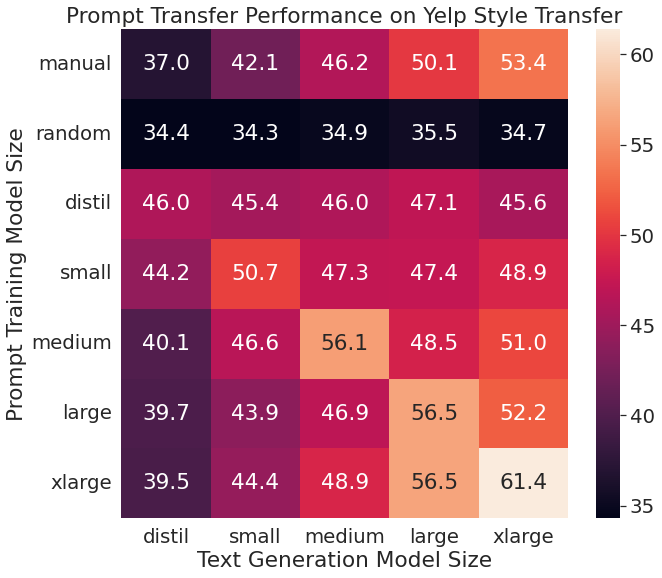

In [371]:
plt.figure(figsize = (10,9))
sns.set(font_scale = 1.8)
sns.heatmap((transfer_matrix.rename_axis(index='Prompt Training Model',
                                         columns='Generation Model')
                            .set_index(pd.Series(model_sizes))), 
            # cbar_kws = dict(use_gridspec=True,location="bottom"),
            annot=True, 
            cmap='rocket',
            fmt='.1f')
plt.ylabel('Prompt Training Model Size')
plt.xlabel('Text Generation Model Size')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.title('Prompt Transfer Performance on Yelp Style Transfer')

In [41]:
df.groupby(['model_name', 'data_size']).sem().reset_index().round(1)

,model_name,data_size,train_reward,self_bertscore,self_bleu,ref_bleu,ref_bertscore,style_acc,ppl,cola_acc,joint_score,gm_score
0,copy,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gpt2-large,all,0.2,0.3,0.4,0.1,0.1,0.5,0.4,0.2,0.8,0.2
2,gpt2-medium,all,0.1,0.3,0.4,0.3,0.2,0.3,0.4,0.2,0.9,0.1
3,gpt2-xl,all,0.2,0.3,0.5,0.2,0.2,0.5,0.4,0.2,1.0,0.2
4,gpt2-xl,null,0.0,0.1,0.1,0.1,0.1,0.1,2.0,0.1,0.1,0.1
5,ref,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
